dimention reduction method


In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import decomposition
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score,confusion_matrix

In [15]:
cancer = pd.read_csv('/content/sample_data/data.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
cancer.drop('Unnamed: 32', axis=1)
cancer.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
cancer.columns

In [17]:
#drop 'id' column - godd practice to drop columns such as id, name, etc as they bear no fruit in model building.
X = cancer.loc[:, ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

y = cancer.loc[:, 'diagnosis']
#scaling of variables
sc = StandardScaler()
scaled_X = sc.fit_transform(X.values)
pd.DataFrame(scaled_X, columns=X.columns).head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [18]:
#encode target variable y
le = LabelEncoder()
y = le.fit_transform(y)
pd.DataFrame(y, columns=['diagnosis']).head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


PCA
Principal Component Analysis

In [19]:
pca = decomposition.PCA()
pca.fit_transform(scaled_X)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

In [20]:
print(X.shape)

(569, 30)


In [21]:
#Information content by all new indep variables
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

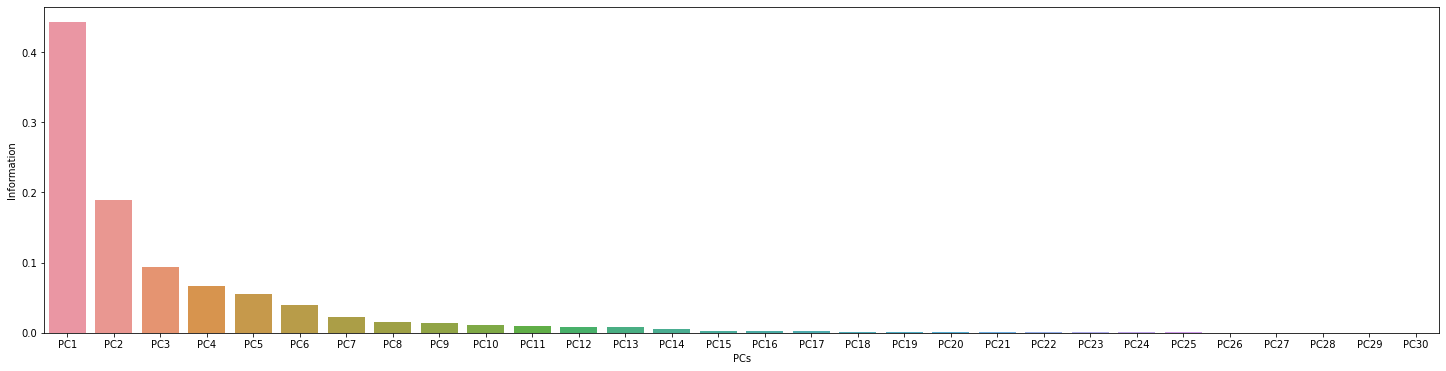

In [22]:
#do a PCA plot and find the correct number of componenets from Elbo
df1 = pd.DataFrame({'Information':pca.explained_variance_ratio_,
                    'PCs':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                          'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                          'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30']})

plt.figure(figsize = (25,6))
sns.barplot(x = 'PCs',y = 'Information',data = df1)

In [25]:
#we will do PCA with only 5 components now as they seem to provide 80% of the information.
pca1 = decomposition.PCA(n_components=5)
pca_5var = pca1.fit_transform(scaled_X)

In [26]:
pca1.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768])

In [27]:
new_X = pd.DataFrame(pca_5var,columns=['PC1','PC2','PC3','PC4','PC5'])
new_X.head()

,PC1,PC2,PC3,PC4,PC5
0,9.192837,1.948583,-1.123166,3.633732,-1.195108
1,2.387802,-3.768172,-0.529294,1.118263,0.621772
2,5.733896,-1.075174,-0.551747,0.912083,-0.177084
3,7.122953,10.275589,-3.232790,0.152546,-2.960879
4,3.935302,-1.948072,1.389767,2.940639,0.546747


In [28]:
#let's compare Logistic Regession with PCA
new_X_train, new_X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.2, random_state = 42)

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(new_X_train, y_train)

y_pred_test = logreg.predict(new_X_test)
print(confusion_matrix(y_test,y_pred_test))
print(accuracy_score(y_test,y_pred_test))

[[70  1]
 [ 1 42]]
0.9824561403508771


In [29]:
#let's compare Logistic Regession without PCA when we have all of the original features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

logreg2 = LogisticRegression(solver='lbfgs')
logreg2.fit(X_train, y_train)

y_pred_test2 = logreg2.predict(X_test)
print(confusion_matrix(y_test, y_pred_test2))
print(accuracy_score(y_test, y_pred_test2))

[[70  1]
 [ 3 40]]
0.9649122807017544


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
# factor loading = PC loadings
pca1.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825723,  0.14188335,  0.27533947],
       [-0.00853125,  0.0645499 , -0.00931422,  0.02869952, -0.10429191,
        -0.07409157,  0.00273385, -0.02556352, -0

LDA
Linear Discriminant Analysis


In [31]:
lda = LinearDiscriminantAnalysis()
new_X_train_lda = lda.fit_transform(X_train, y_train)

In [32]:
lda.explained_variance_ratio_

array([1.])

In [33]:
new_X_train_lda_df = pd.DataFrame(new_X_train_lda,columns=['LDA1'])
new_X_train_lda_df.head()

,LDA1
0,-1.224652
1,4.626201
2,-2.362597
3,-0.882508
4,-2.405264


In [35]:
lda.coef_

array([[-3.80341976e+00,  5.39212301e-02,  4.39436335e-01,
         6.34042278e-03, -7.93926949e+00, -9.65027592e+01,
         1.94072071e+01,  9.48433359e+01, -6.52894977e+00,
         1.12179949e+02,  8.34003815e+00, -2.43731481e-01,
        -1.59124190e-01, -2.40224154e-02,  3.48805766e+02,
        -4.26007772e+01, -8.24576776e+01,  3.50357849e+02,
        -2.30465093e+01, -5.81140729e+01,  4.13737425e+00,
         1.85553514e-01, -1.68084303e-01, -1.85463710e-02,
         2.55422830e+00,  1.47149164e+01,  1.18801082e+01,
        -2.55875979e+01,  1.97016750e+01,  2.45735089e+01]])

In [36]:
lg2 = LogisticRegression()
lg2.fit(new_X_train_lda, y_train)

new_x_test_lda = lda.transform(X_test)
y_test_pred_lda = lg2.predict(new_x_test_lda)

print(confusion_matrix(y_test, y_test_pred_lda))
print(accuracy_score(y_test, y_test_pred_lda))

[[67  4]
 [ 2 41]]
0.9473684210526315


In [37]:
cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64